In [279]:
import os
os.getcwd()

import numpy as np
import matplotlib.pyplot as plt


In [235]:
x = np.load('data\data1_x.npy')
y = np.load('data\data1_y.npy')

x = x - np.mean(x)
y = y - np.mean(y)

In [236]:
#useless but it sorts a list
def sort_array(x):
    for i in range(0,len(x)):
        for j in range(i+1, len(x)):
            if x[i]>x[j]:
                temp = x[i];    
                x[i] = x[j];    
                x[j] = temp; 
    return x

In [237]:
#sort x and y ascendingly
x = x[x[:,0].argsort()]
y = y[y[:,0].argsort()]

In [286]:
def linReg(x, y, p):
    xtrain = x
    
    xtxinv = np.linalg.inv(np.matmul(np.transpose(xtrain), xtrain))
    xty = np.matmul(np.transpose(xtrain), y)
    betas = np.matmul(xtxinv, xty)
    
    y_pred = np.matmul(xtrain, betas)
    sse = np.sum(np.power(y-y_pred, 2))
    
    print('Parameter estimates: ', betas, '\nSum of Squared Errors: ', sse)
    print(x)
    
    plt.scatter(xtrain,y)
    plt.plot(xtrain, y_pred, 'g')
    plt.title('Linear Regression')
    plt.xlabel('x')
    plt.ylabel('y')
    
    return betas, sse


Parameter estimates:  [[1.74662083]] 
Sum of Squared Errors:  0.3379365342322449
[[-0.8238786 ]
 [-0.75633169]
 [-0.72673386]
 [-0.68821786]
 [-0.65348927]
 [-0.60490931]
 [-0.60284137]
 [-0.43987646]
 [-0.29848208]
 [-0.16170214]
 [-0.1572957 ]
 [ 0.17024324]
 [ 0.17515302]
 [ 0.4361288 ]
 [ 0.55821701]
 [ 0.59136984]
 [ 0.84105241]
 [ 0.88826103]
 [ 1.12538598]
 [ 1.127947  ]]


(array([[1.74662083]]), 0.3379365342322449)

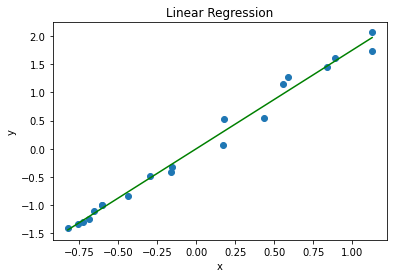

In [287]:
linReg(x,y,1)

# Polynomial regression

In [497]:
x2 = np.load('data\data2_x.npy')
y2 = np.load('data\data2_y.npy')
#x2 = x2 - np.mean(x2)
#y2 = y2 - np.mean(y2)

In [498]:
#reorder
index = np.argsort(x2, axis = 0).reshape((-1,))
x2 = x2[index]
y2 = y2[index]


In [499]:
def polyReg(x, y, p=2):
    a=np.ones((50,1)) 
    xpoly = x**2
    xtrain = np.column_stack((a, x, xpoly))
    
    xtxinv = np.linalg.inv(np.matmul(np.transpose(xtrain), xtrain))
    xty = np.matmul(np.transpose(xtrain), y)
    betas = np.matmul(xtxinv, xty)
    y_pred = np.matmul(xtrain, betas)
    
    errors = y-y_pred
    sse = np.sum(np.power(errors, 2))
    
    print('Parameter estimates: ', betas, '\nSum of Squared Errors: ', sse)
    
    plt.scatter(x,y)
    plt.plot(x, y_pred, 'g')
    return errors
    

Parameter estimates:  [[ 0.97571963]
 [-0.02571951]
 [-1.53223529]] 
Sum of Squared Errors:  1.3415937153692248


array([[ 0.2010945 ],
       [ 0.06284827],
       [ 0.18217912],
       [ 0.16467569],
       [-0.28221832],
       [-0.0891696 ],
       [ 0.07721457],
       [ 0.21267139],
       [ 0.09269126],
       [-0.30309585],
       [-0.20808647],
       [-0.03930453],
       [-0.14144896],
       [ 0.00993874],
       [-0.40892404],
       [-0.33197131],
       [ 0.14189106],
       [-0.01552197],
       [ 0.10904146],
       [ 0.02094377],
       [-0.08299414],
       [ 0.31097431],
       [-0.02146116],
       [ 0.03439001],
       [ 0.02719603],
       [ 0.29591591],
       [ 0.20588483],
       [ 0.3528229 ],
       [-0.06271606],
       [ 0.06722927],
       [-0.00360082],
       [-0.02230597],
       [ 0.0997765 ],
       [ 0.00172135],
       [-0.14051787],
       [-0.07844775],
       [-0.20609917],
       [-0.10490245],
       [-0.00048261],
       [-0.11897804],
       [-0.03724296],
       [ 0.05020725],
       [-0.09690564],
       [-0.09265526],
       [-0.21169012],
       [ 0

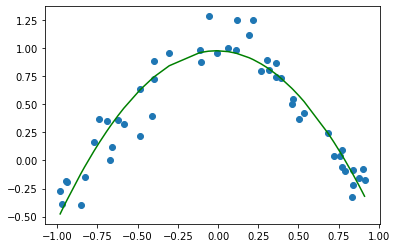

In [500]:
polyReg(x2, y2)

In [501]:
x2a = np.load('data\data2a_x.npy')
y2a = np.load('data\data2a_y.npy')

In [502]:
#reorder
index = np.argsort(x2a, axis = 0).reshape((-1,))
x2a = x2a[index]
y2a = y2a[index]

Parameter estimates:  [ 1.08683863  0.05615907 -1.60379935] 
Sum of Squared Errors:  9.890106848617197


array([ 0.23935343,  0.09888539,  0.21206885,  0.19423213, -0.27137975,
       -0.08300972,  0.07194593,  0.20100947,  0.07263205, -0.32739835,
       -0.23381655, -0.07186067, -0.17994815, -0.04439071, -0.46369878,
       -0.39742633,  0.07495609, -0.08275806,  0.0293684 , -0.07982085,
       -0.18480237,  0.20495851, -0.13184984,  2.21840409, -0.09203223,
        0.17628055,  0.0816342 ,  0.22725039, -0.19062115, -0.06210934,
       -0.13356012, -0.15363831, -0.03156171, -0.13040806, -0.27411797,
       -0.21219894, -0.34031303, -0.23934199, -0.13412986, -0.25192691,
       -0.16929294, -0.08149278, -0.22856518,  1.77619861, -0.34128722,
       -0.09061182, -0.22276828, -0.05423139,  0.0882613 ,  0.01892997])

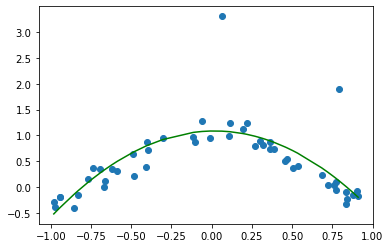

In [503]:
polyReg(x2a, y2a)

Parameter estimates:  [ 1.08683863  0.05615907 -1.60379935] 
Sum of Squared Errors:  9.890106848617197


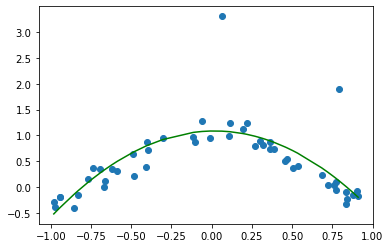

In [508]:
error_inliers = []

for error in polyReg(x2a, y2a):
    if abs(error) > 1:
        error_inliers.append(error)
    else: pass
        

In [511]:
print('SSE without outliers: ', np.sum(error_inliers))

SSE without outliers:  3.9946027049095596


Regularization using Ridge and Lasso regression

In [518]:
import sklearn.linear_model as sk

In [519]:
x = np.load('data\data3_x.npy')
y = np.load('data\data3_y.npy')

In [561]:
sk.Ridge()
sk.Lasso()

Lasso()

Ridge Regression

In [562]:
coefs_x0 = []
coefs_x1 = []
coefs_x2 = []

alphas = []

for alpha in np.arange(0.01, 10, 0.01):
    rr = sk.Ridge(alpha, max_iter = 10000)
    rr.fit(x,y)
    betas = rr.coef_
    coefs_x0.append(betas[0][0])
    coefs_x1.append(betas[0][1])
    coefs_x2.append(betas[0][2])
    alphas.append(alpha)
    ypred = rr.predict(x)
    sse_rr = sum((ypred-y)**2)

sse_rr

array([29.85351315])

Lasso Regression

In [560]:
coefs_x0l = []
coefs_x1l = []
coefs_x2l = []

alphas = []

for alpha in np.arange(0.01, 10, 0.01):
    lasso = sk.Lasso(alpha, max_iter = 10000)
    lasso.fit(x,y)
    betas_lasso = lasso.coef_ 
    coefs_x0l.append(betas_lasso[0])
    coefs_x1l.append(betas_lasso[1])
    coefs_x2l.append(betas_lasso[2])
    ypred_lasso = lasso.predict(x)
    sse_lasso = sum((ypred_lasso-y)**2)
    

OLS 

In [565]:
coefs_x0ls = []
coefs_x1ls = []
coefs_x2ls = []

alphas = []

for alpha in np.arange(0.01, 10, 0.01):
    rr = sk.Ridge(0, max_iter = 10000)
    rr.fit(x,y)
    betas = rr.coef_
    coefs_x0ls.append(betas[0][0])
    coefs_x1ls.append(betas[0][1])
    coefs_x2ls.append(betas[0][2])
    alphas.append(alpha)
    ypred = rr.predict(x)
    sse_rr = sum((ypred-y)**2)

Text(0, 0.5, 'betas')

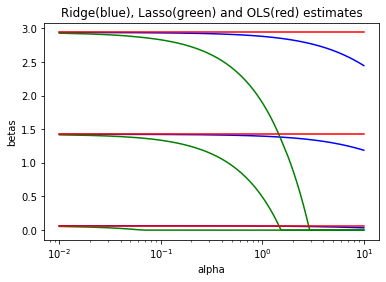

In [571]:
plt.plot(alphas, coefs_x0, 'b')
plt.plot(alphas, coefs_x1, 'b')
plt.plot(alphas, coefs_x2, 'b')

plt.plot(alphas, coefs_x0l, 'g')
plt.plot(alphas, coefs_x1l, 'g')
plt.plot(alphas, coefs_x2l, 'g')

plt.plot(alphas, coefs_x0ls, 'r')
plt.plot(alphas, coefs_x1ls, 'r')
plt.plot(alphas, coefs_x2ls, 'r')

plt.xscale('log')
plt.title('Ridge(blue), Lasso(green) and OLS(red) estimates')
plt.xlabel('alpha')
plt.ylabel('betas')
